### Jury Selection
In 2010, the ACLU presented a report on jury selection in Alameda County, California. Thereport concluded that certain ethnic groups are underrepresented among jury panelists inAlameda County, and suggested some reforms of the process by which eligible jurors areassigned to panels. In this section, we will perform our own analysis of the data and examinesome questions that arise as a result

#### ANSWER

##### Null Hypothesis:-panels were selected at random from the population of eligible jurors. 

##### Alternate Hypothesis:-panels were not selected at random

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [3]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [4]:
Alameda_df_1 = Alameda_df.set_index('Ethnicity')
Alameda_df_1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


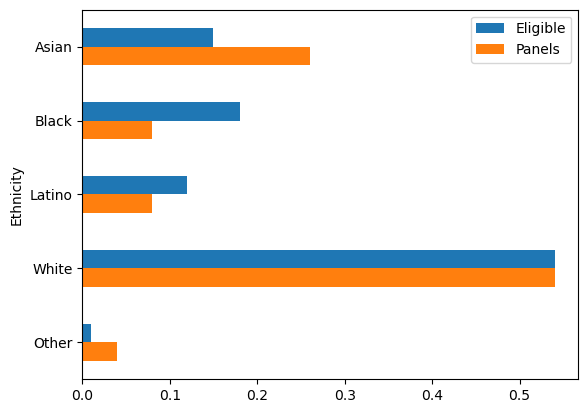

In [5]:
#Bar chart for visualising the difference
Alameda_df_1 .plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

#### Distance between Two Distributions

In [6]:
#add a column for difference in eligible and panel 
Alameda_df_1['jury_with_diffs'] = Alameda_df_1['Panels']-Alameda_df_1['Eligible']
Alameda_df_1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


Take a look at the column Difference and notice that the sum of its entries is 0: the positive entries add up to 0.14, exactly canceling the total of the negative entries which is -0.14.

This is numerical evidence of the fact that in the bar chart, the gold bars exceed the blue bars by exactly as much as the blue bars exceed the gold. The proportions in each of the two columns Panels and Eligible add up to 1, and so the give-and-take between their entries must add up to 0.

To avoid the cancellation, we drop the negative signs and then add all the entries. But this gives us two times the total of the positive entries (equivalently, two times the total of the negative entries, with the sign removed). So we divide the sum by 2.

In [7]:
#finding ab
Alameda_df_1['Abs.Difference']=abs(Alameda_df_1['jury_with_diffs'])
Alameda_df_1

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [8]:
test_statistic = Alameda_df_1['Abs.Difference'].sum()/2
test_statistic

0.14

This quantity 0.14 is the total variation distance (TVD) between the distribution of ethnicities in the eligible juror population and the distribution in the panels.

We could have obtained the same result by just adding the positive differences. But our method of including all the absolute differences eliminates the need to keep track of which differences are positive and which are not.

In [9]:
import numpy as np

In [10]:
#function for calculating total variation distance
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [11]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda_df, 'Eligible', 'Panels')
print(observed_stat)

0.14


#### Are the panels representative of the population?

#### sampling at Random from the Eligible Population


In [12]:
panel_size = 1453

In [13]:
import numpy.random as npr
np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([223, 253, 176, 779,  22])

In [14]:
Alameda_df_2 = pd.DataFrame(Alameda_df_1,columns = ['Eligible','Panels'])

In [15]:
Alameda_df_2['Random Sample'] = np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.151411
Black,0.18,0.08,0.192017
Latino,0.12,0.08,0.100482
White,0.54,0.54,0.547832
Other,0.01,0.04,0.008259


the distribution of the random sample is close to the distribution of the eligible population and is different from the distribution of the panels.

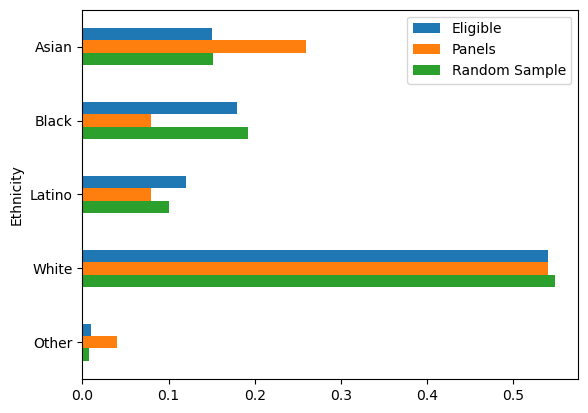

In [16]:
Alameda_df_2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

The green bar are  closer in size to the blue bars than the orange bars are. The randomsample resembles the eligible population, but the panels don't.

In [17]:
#Difference between eligible and Random sample
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample'])).sum()/2
TVD

0.021259463179628322

The Total variation distance(TVD) between the eligible population and the panels was 0.14, but the TVD between the eligible population and the random sample is much smaller.

#### Emperical distribution of TVDs

In [18]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    Alameda_df_2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(Alameda_df_2, 'Eligible', 'Random Sample'))
    
tvd_list

[0.013000688231245686,
 0.01815554026152787,
 0.022601514108740506,
 0.02448038540949759,
 0.023103922918100518,
 0.020633172746042684,
 0.022450103234686873,
 0.008575361321404008,
 0.008878183069511346,
 0.011348933241569152,
 0.022133516861665526,
 0.028871300757054373,
 0.01887818306951136,
 0.02112181693048865,
 0.02231933929800413,
 0.012284927735719153,
 0.01887818306951135,
 0.017467309015829272,
 0.007198898830006903,
 0.014466620784583589,
 0.012601514108740502,
 0.016627666896077094,
 0.02200963523743981,
 0.010536820371644863,
 0.028203716448726778,
 0.013833448038540997,
 0.033392980041293895,
 0.027460426703372308,
 0.023296627666896087,
 0.017192016517549896,
 0.016531314521679247,
 0.01618719889883,
 0.016627666896077125,
 0.01286304198210601,
 0.02782518926359254,
 0.010075705437026825,
 0.02498967653131448,
 0.017632484514797018,
 0.03199587061252579,
 0.005209910529938062,
 0.01863041982105987,
 0.012278045423262166,
 0.010908465244322048,
 0.019848589125946323,
 0.0

In [19]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.013001
1,0.018156
2,0.022602
3,0.024480
4,0.023104


Each row of the column above contains the total variation distance between a random sample of size 1453 (the size of the panels) and the population of eligible jurors.

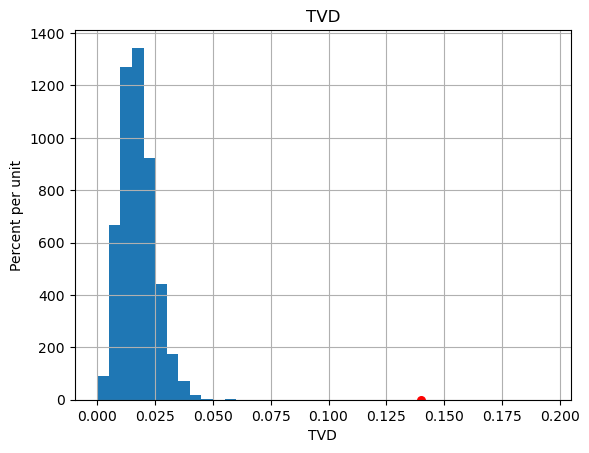

In [20]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)

 distance between the panels and the population was 0.14,so it is farawaay from the distribution. panels were not representative of the distribution provided for the eligible jurors.
 
 hence  Null hypothesis is rejected